..




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('/content/diabetes.csv')  # It reads the csv file that has been imported

In [3]:
df.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1


In [4]:
df.shape

(449, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               449 non-null    int64  
 1   Glucose                   449 non-null    int64  
 2   Insulin                   449 non-null    int64  
 3   BMI                       447 non-null    float64
 4   DiabetesPedigreeFunction  446 non-null    float64
 5   Age                       449 non-null    int64  
 6   Outcome                   449 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 24.7 KB


In [6]:
df.describe()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,449.000000,449.000000,449.000000,447.000000,446.000000,449.000000,449.000000
mean,3.824053,121.532294,81.305122,32.100447,0.489101,32.719376,0.383073
std,3.331767,32.622495,121.666839,8.225385,0.354875,11.047447,0.486678
min,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,0.000000,27.200000,0.251250,24.000000,0.000000
50%,3.000000,117.000000,36.000000,32.000000,0.381000,29.000000,0.000000
75%,6.000000,143.000000,128.000000,36.600000,0.647000,39.000000,1.000000
max,17.000000,197.000000,846.000000,67.100000,2.420000,69.000000,1.000000


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
Insulin,0
BMI,2
DiabetesPedigreeFunction,3
Age,0
Outcome,0


In [9]:
df.isnull().any()

,0
Pregnancies,False
Glucose,False
Insulin,False
BMI,True
DiabetesPedigreeFunction,True
Age,False
Outcome,False


In [10]:
df[df.isnull().any(axis=1)]

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
11,10,168,0,38.0,NaN,34,1
19,1,115,96,NaN,0.529,32,1
41,7,133,0,NaN,0.696,37,0
46,1,146,0,29.7,NaN,29,0
71,5,139,140,28.6,NaN,26,0


In [11]:
df.BMI.isnull().sum()

np.int64(2)

In [12]:
median_BMI = math.floor(df.BMI.median())
median_BMI

32

In [13]:
df.BMI = df.BMI.fillna(median_BMI)
df.BMI.isnull().sum()

np.int64(0)

In [14]:
df[df.isnull().any(axis=1)]

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
11,10,168,0,38.0,NaN,34,1
46,1,146,0,29.7,NaN,29,0
71,5,139,140,28.6,NaN,26,0


In [15]:
df.DiabetesPedigreeFunction.isnull().sum()

np.int64(3)

In [16]:
median_DiabetesPedigreeFunction = math.floor(df.DiabetesPedigreeFunction.median())
median_DiabetesPedigreeFunction

0

In [17]:
df.DiabetesPedigreeFunction = df.DiabetesPedigreeFunction.fillna(median_DiabetesPedigreeFunction)
df.DiabetesPedigreeFunction.isnull().sum()

np.int64(0)

In [18]:
df[df.isnull().any(axis=1)]


,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [19]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [20]:
def fill_missing_numerical(df):

    df_filled = df.copy()
    df_filled.fillna(df_filled.mean(numeric_only=True), inplace=True)
    return df_filled

In [21]:
df = fill_missing_numerical(df)

In [22]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


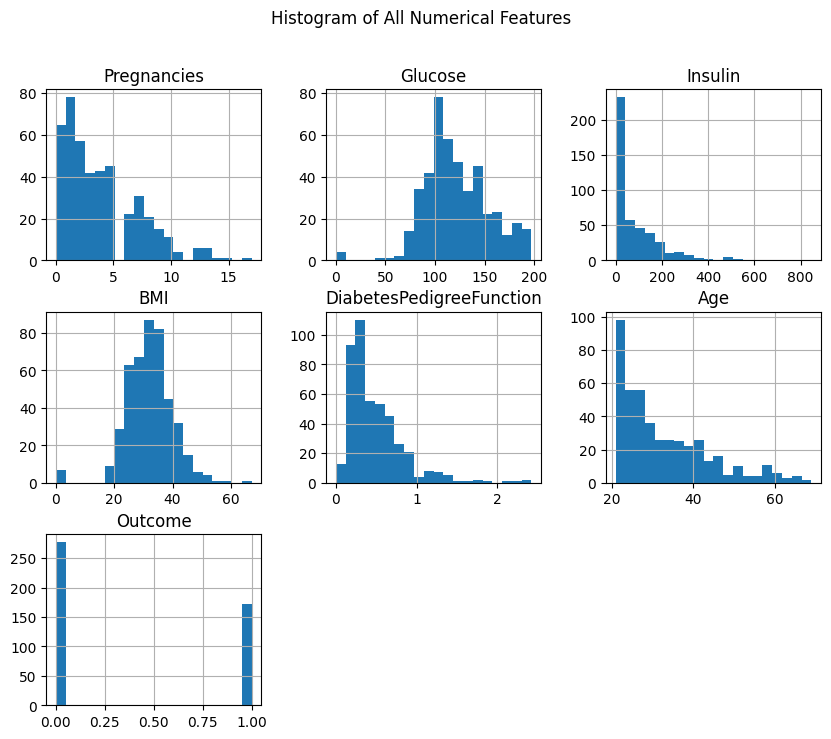

In [23]:
df.hist(figsize=(10, 8), bins=20)
plt.suptitle("Histogram of All Numerical Features")
plt.show()

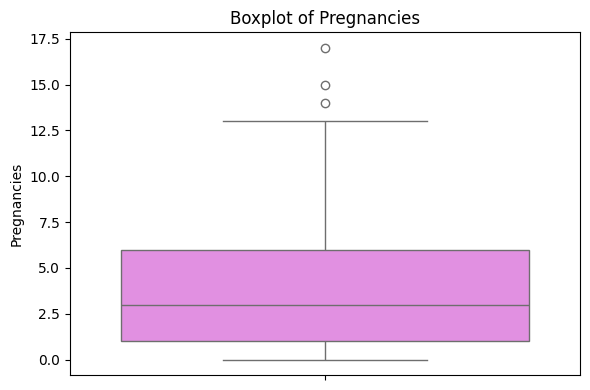

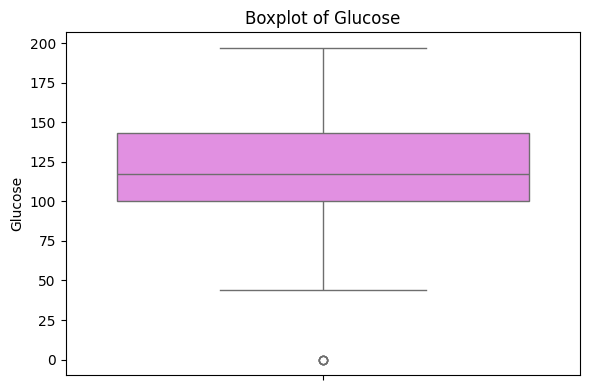

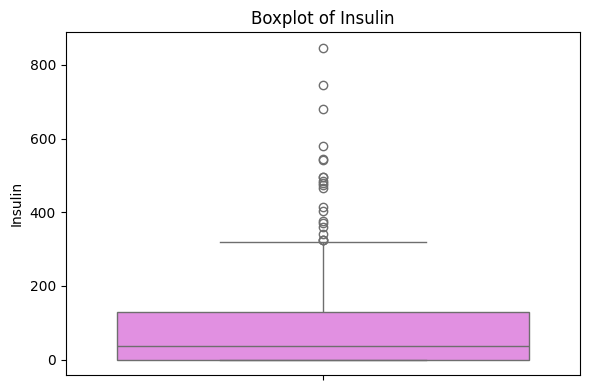

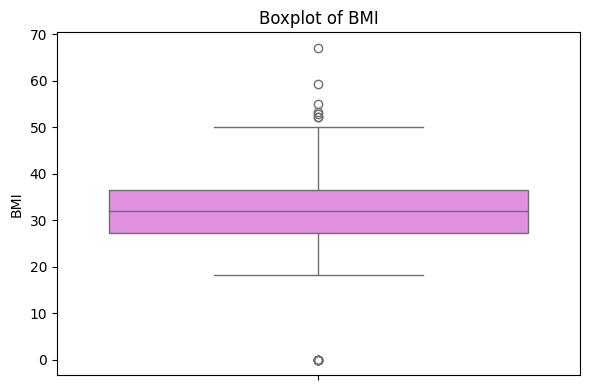

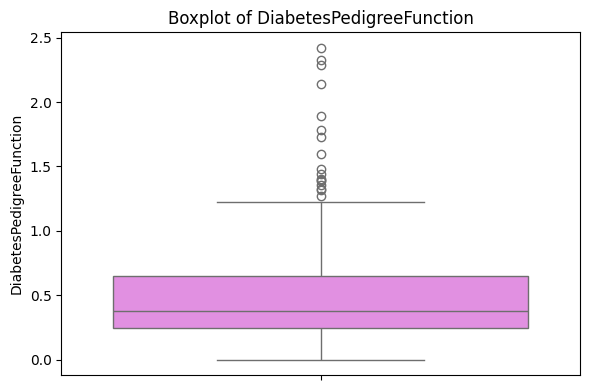

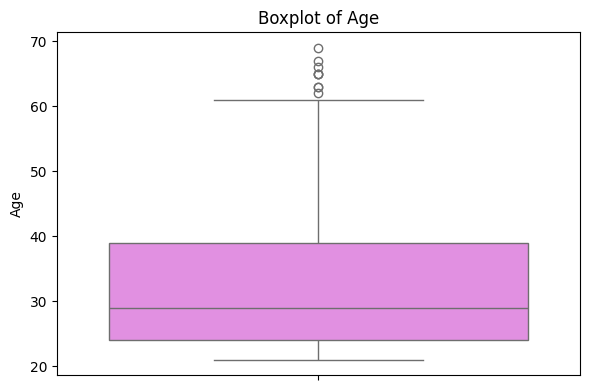

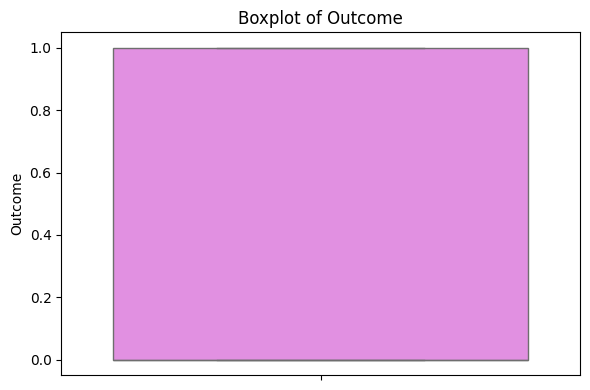

In [24]:
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[column], color='violet')
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()

In [47]:
df.loc[df['Age'] > 40, 'Age'] = df['Age'].median()
df.loc[df['Pregnancies'] > 6, 'Pregnancies'] = df['Pregnancies'].median()
df.loc[df['Insulin'] > 200, 'Insulin'] = df['Insulin'].median()
df.loc[df['DiabetesPedigreeFunction'] > 0.8, 'DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].median()
df.loc[df['Outcome'] > 1.0, 'Outcome'] = df['Pregnancies'].median()

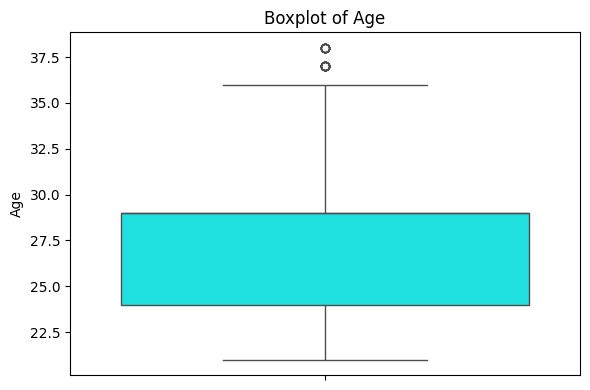

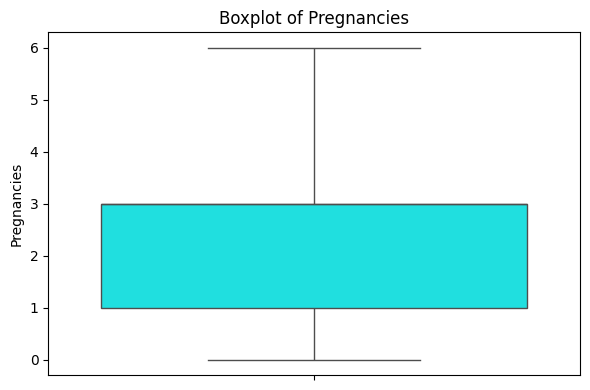

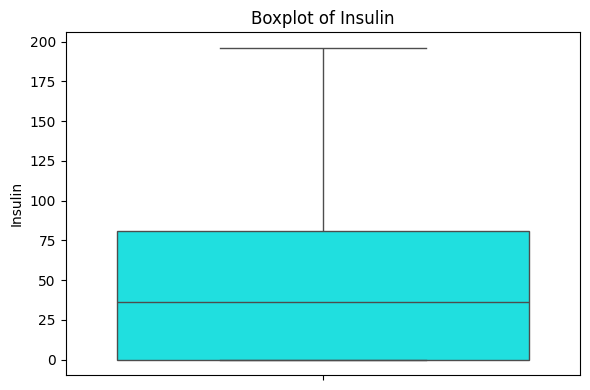

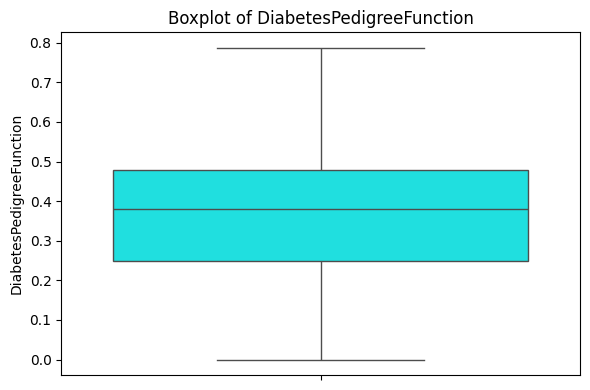

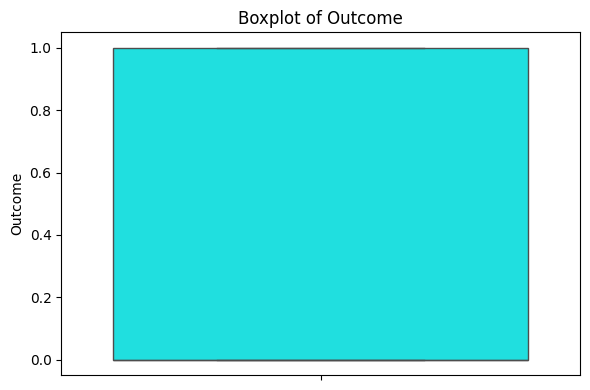

In [48]:
column = 'Age'
plt.figure(figsize=(6, 4))
sns.boxplot(y=df[column], color='cyan')
plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

column = 'Pregnancies'
plt.figure(figsize=(6, 4))
sns.boxplot(y=df[column], color='cyan')
plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

column = 'Insulin'
plt.figure(figsize=(6, 4))
sns.boxplot(y=df[column], color='cyan')
plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

column = 'DiabetesPedigreeFunction'
plt.figure(figsize=(6, 4))
sns.boxplot(y=df[column], color='cyan')
plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

column = 'Outcome'
plt.figure(figsize=(6, 4))
sns.boxplot(y=df[column], color='cyan')
plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [27]:
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)

In [28]:
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    for val in df[col]:
        if val < lower_bound:
            df.loc[df[col] == val, col] = lower_bound
        elif val > upper_bound:
            df.loc[df[col] == val, col] = upper_bound


<ipython-input-28-1200663837>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '35.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] == val, col] = lower_bound


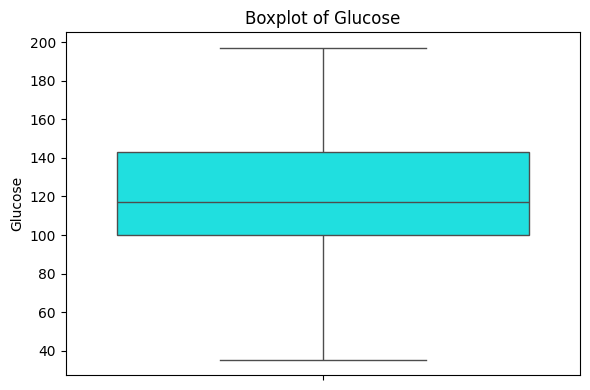

In [29]:
column = 'Glucose'
plt.figure(figsize=(6, 4))
sns.boxplot(y=df[column], color='cyan')
plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

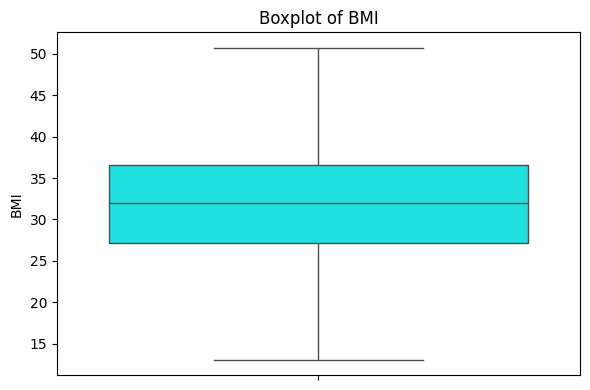

In [30]:
column = 'BMI'
plt.figure(figsize=(6, 4))
sns.boxplot(y=df[column], color='cyan')
plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

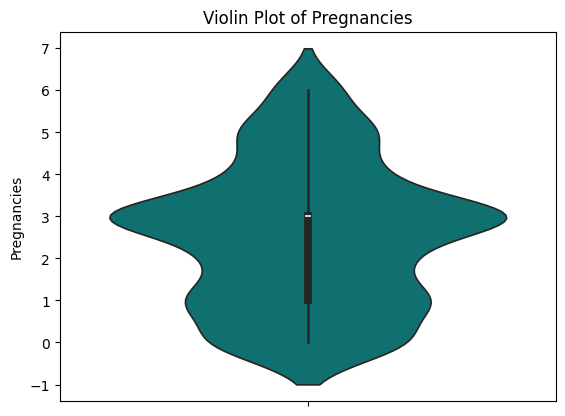

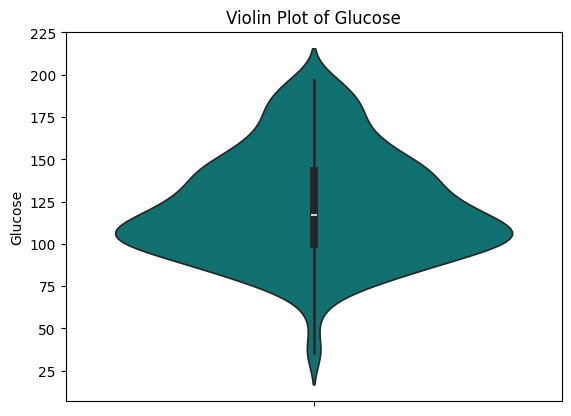

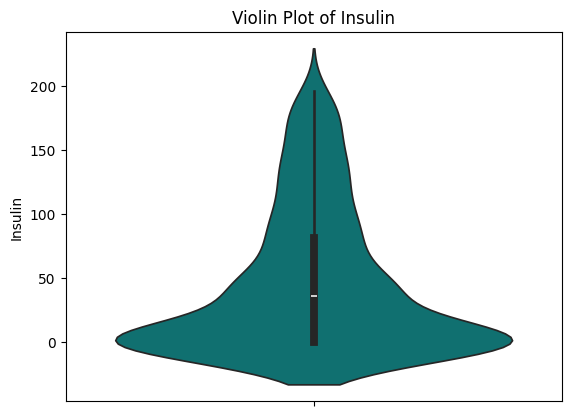

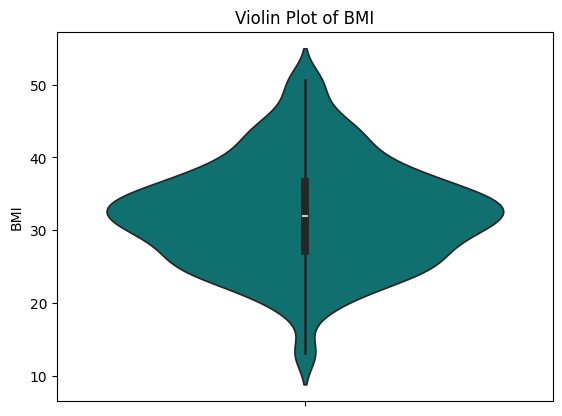

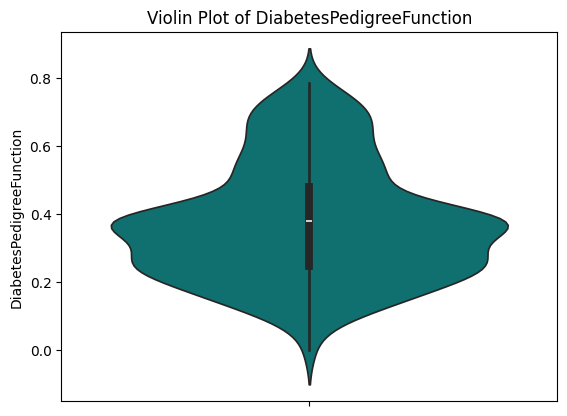

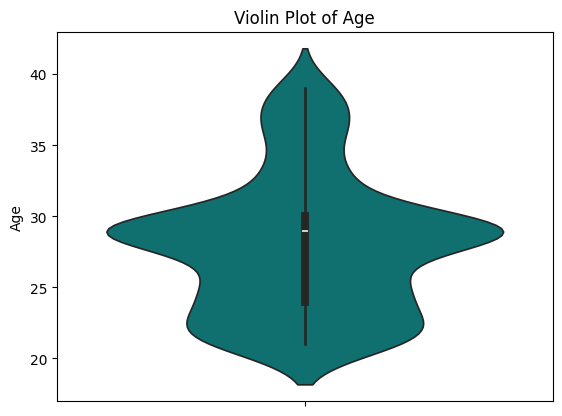

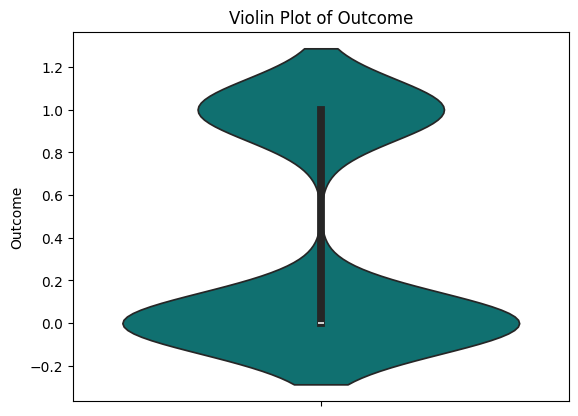

In [31]:
for column in df.columns:
   sns.violinplot(y=df[column], color='teal')
   plt.title(f'Violin Plot of {column}')
   plt.show()


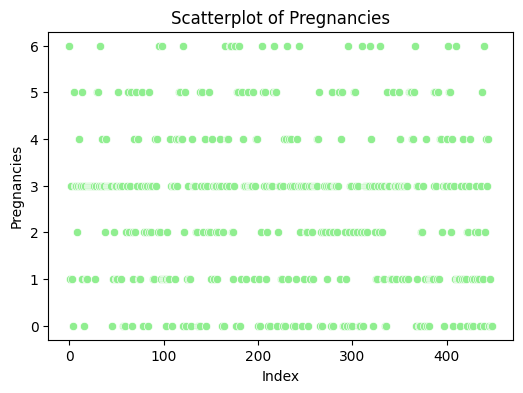

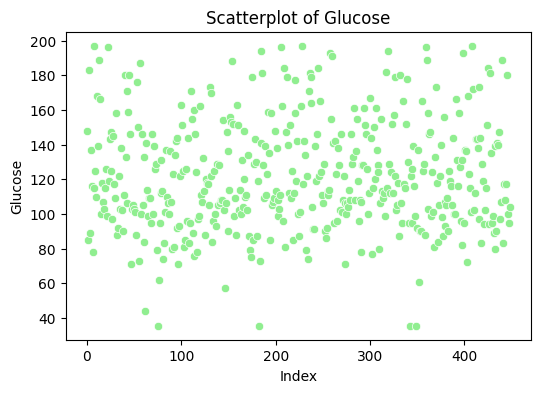

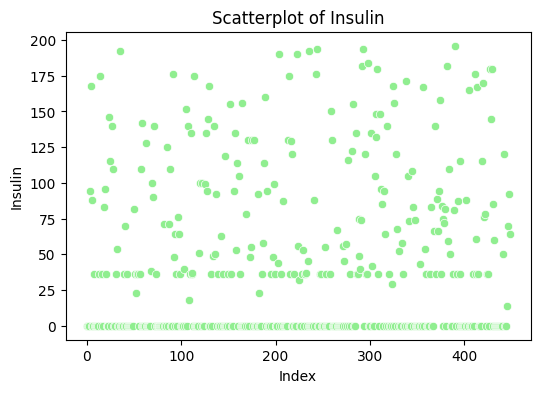

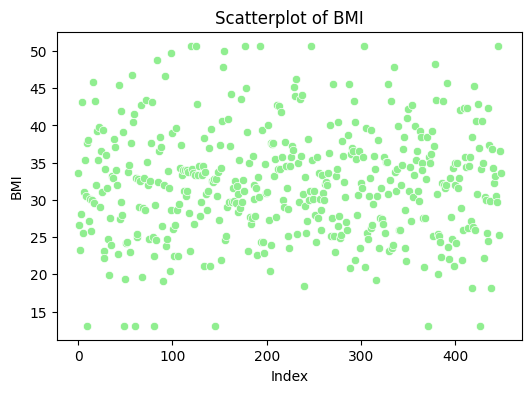

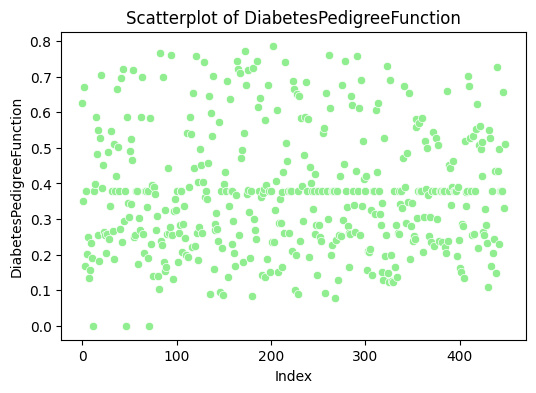

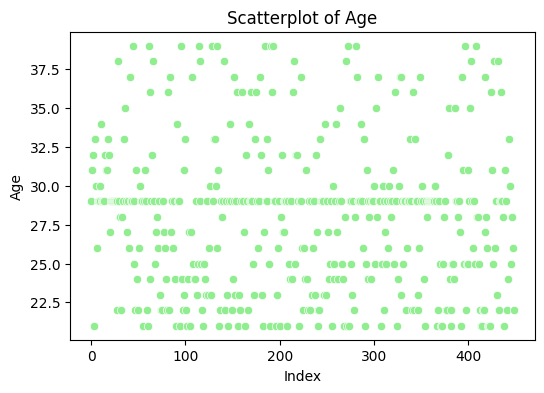

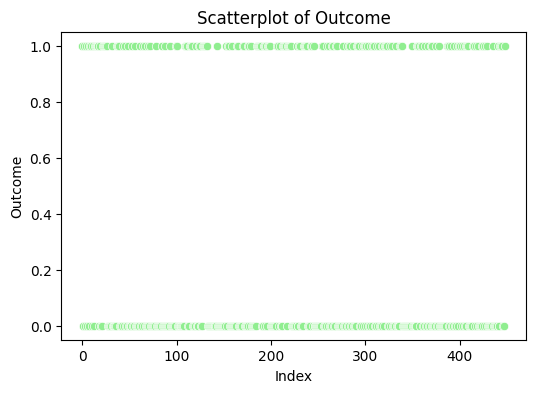

In [32]:
for column in df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df.index, y=df[column], color = 'lightgreen')
    plt.title(f'Scatterplot of {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()


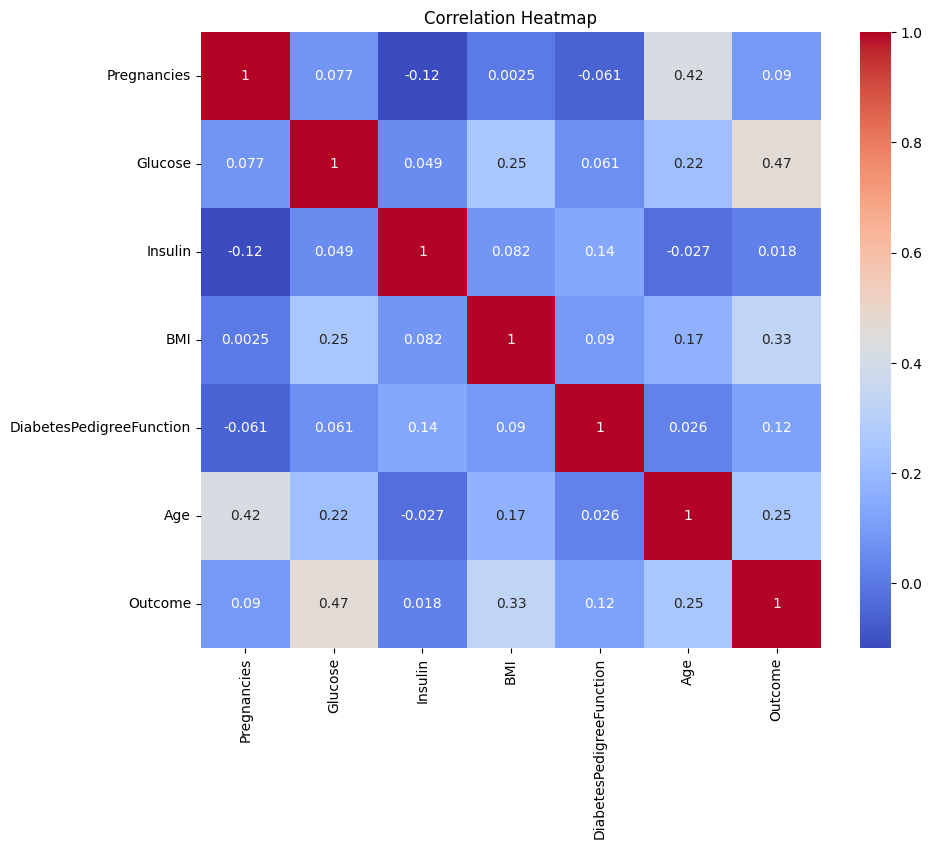

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

-----------------------------

In [34]:
new_df = df.drop(columns=['Pregnancies', 'DiabetesPedigreeFunction'])

In [35]:
new_df

,Glucose,Insulin,BMI,Age,Outcome
0,148.0,0,33.6,29,1
1,85.0,0,26.6,31,0
2,183.0,0,23.3,32,1
3,89.0,94,28.1,21,0
4,137.0,168,43.1,33,1
...,...,...,...,...,...
444,117.0,0,29.7,30,1
445,180.0,14,50.7,25,1
446,100.0,70,25.3,28,0
447,95.0,92,36.5,26,0


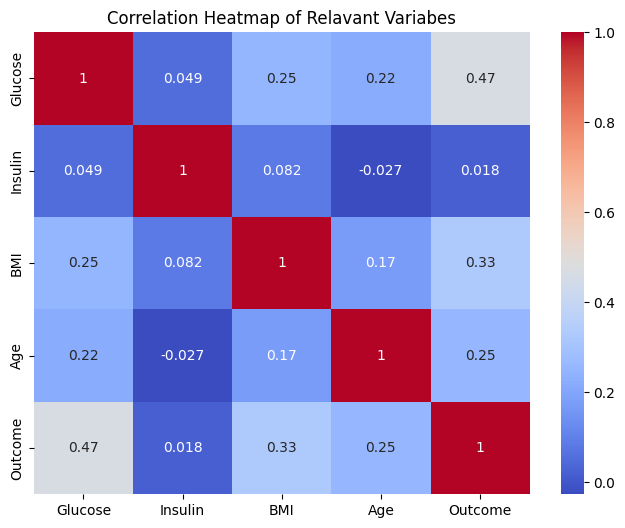

In [36]:
plt.figure(figsize=(8,6))
sns.heatmap(new_df.corr(),annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Relavant Variabes")
plt.show()

In [37]:
new_df

,Glucose,Insulin,BMI,Age,Outcome
0,148.0,0,33.6,29,1
1,85.0,0,26.6,31,0
2,183.0,0,23.3,32,1
3,89.0,94,28.1,21,0
4,137.0,168,43.1,33,1
...,...,...,...,...,...
444,117.0,0,29.7,30,1
445,180.0,14,50.7,25,1
446,100.0,70,25.3,28,0
447,95.0,92,36.5,26,0


In [38]:
X = new_df.drop('Outcome', axis=1)
y = new_df["Outcome"]


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [42]:
y_pred = model.predict(X_test_scaled)


In [43]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Confusion Matrix:
[[41 10]
 [18 21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.80      0.75        51
           1       0.68      0.54      0.60        39

    accuracy                           0.69        90
   macro avg       0.69      0.67      0.67        90
weighted avg       0.69      0.69      0.68        90

Accuracy: 0.69


In [44]:


#  Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Confusion Matrix:
[[40 11]
 [16 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.78      0.75        51
           1       0.68      0.59      0.63        39

    accuracy                           0.70        90
   macro avg       0.70      0.69      0.69        90
weighted avg       0.70      0.70      0.70        90

Accuracy: 0.70
